<a href="https://colab.research.google.com/github/NikolayIvTkachenko/Colab_Python_AI_NeuroNetwork/blob/main/NeuronNetwork_01v03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Actual value of the digit: 5


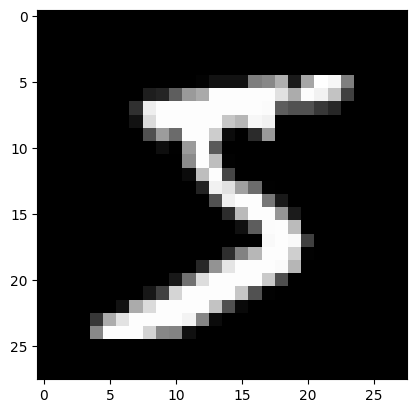

In [24]:
plt.imshow(x_train[0], cmap='gray')
print("Actual value of the digit: {0}".format(y_train[0]))

In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [26]:
x_train = x_train/255.0
x_test = x_test/255.0

In [36]:
class NN_Test_Model(tf.keras.Model):
  def __init__(self, input_shape, target_classes):
    super(NN_Test_Model, self).__init__()

    self.inputs=tf.keras.layers.InputLayer(input_shape)
    self.hidden_1 = tf.keras.layers.Dense(128, activation='relu')
    self.hidden_2 = tf.keras.layers.Dense(128, activation='relu')
    self.outputs = tf.keras.layers.Dense(target_classes)

  def call(self, x):
    x = self.inputs(x)
    x = self.hidden_1(x)
    x = self.hidden_2(x)
    x = self.outputs(x)
    return x


In [37]:
model = NN_Test_Model((784,),10)

In [33]:
model.summary()

Model: "nn__test__model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Обучение модели
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [31]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    steps_per_epoch=200,
    verbose=2,
    validation_steps=50,
    validation_split=0.2
    )

Epoch 1/50


TypeError: Exception encountered when calling NN_Test_Model.call().

[1mtoo many positional arguments[0m

Arguments received by NN_Test_Model.call():
  • x=tf.Tensor(shape=(32, 784), dtype=float32)